In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [23]:
# 1. Đọc ảnh và chuyển sang RGB (để hiển thị đúng màu trên Matplotlib)
img = cv2.imread("cat.jpg") 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(-0.5, 509.5, 511.5, -0.5)

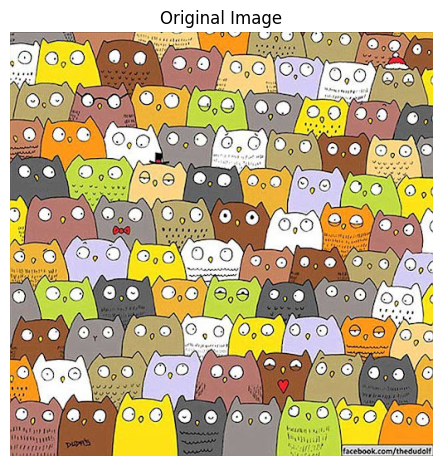

In [24]:
# 2. Hiển thị ảnh gốc
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

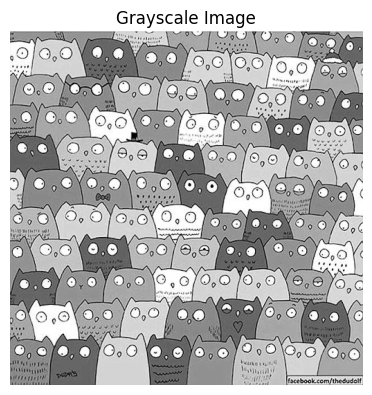

In [25]:
# 3. Chuyển sang ảnh xám và hiển thị
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.subplot(1, 2, 2)
plt.imshow(gray, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

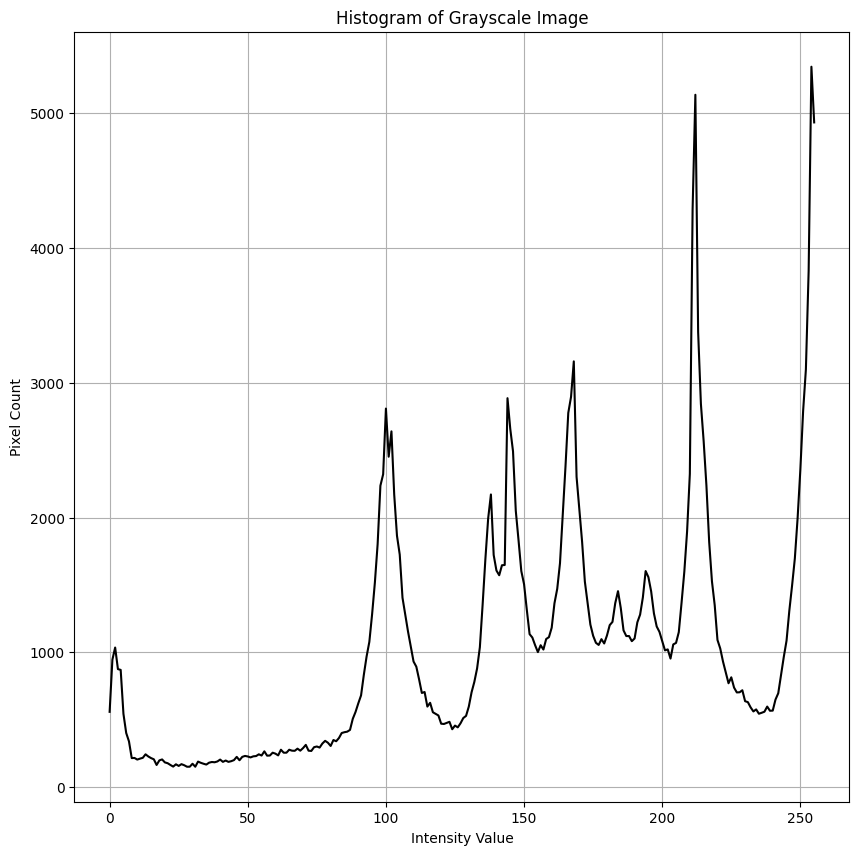

In [26]:
# 4. Tính và hiển thị histogram của ảnh xám
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.plot(hist, color='black')
plt.title("Histogram of Grayscale Image")
plt.xlabel("Intensity Value")
plt.ylabel("Pixel Count")
plt.grid(True)
plt.show()

In [27]:
# 5. Tiền xử lý ảnh: Làm mịn (GaussianBlur) để giảm nhiễu
blur = cv2.GaussianBlur(gray, (5, 5), 0)

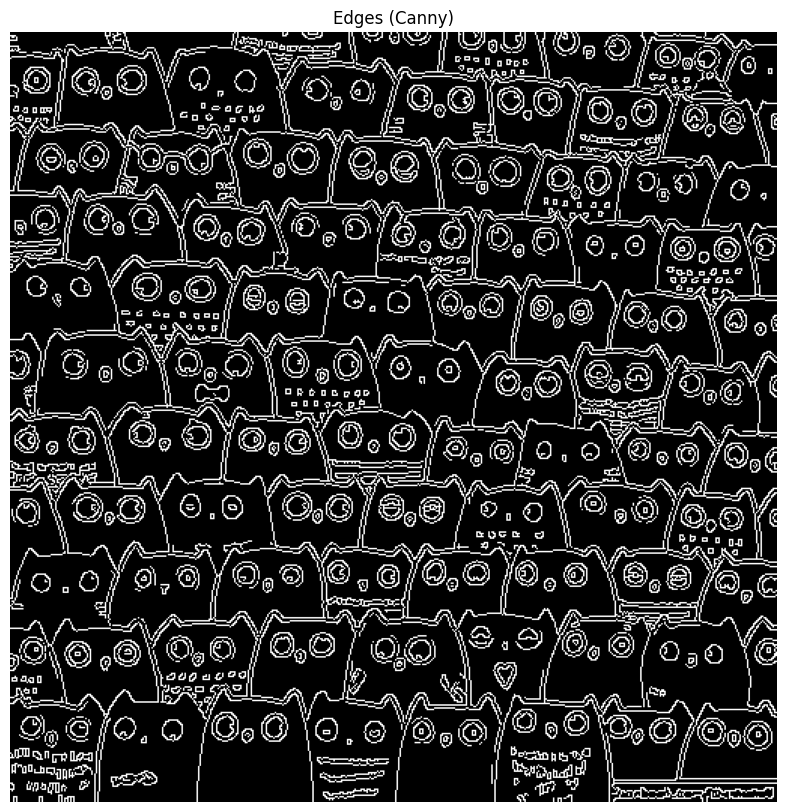

In [28]:
# 6. Phát hiện biên bằng Canny
edges = cv2.Canny(blur, 50, 150)

# Hiển thị ảnh biên
plt.imshow(edges, cmap='gray')
plt.title("Edges (Canny)")
plt.axis("off")
plt.show()

In [29]:
# 7. Tìm các đường viền (Contours)
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [30]:
# 8. Lọc contour và vẽ bounding box
img_contours = img.copy()
min_area = 100  # Ngưỡng diện tích tối thiểu để loại bỏ contour quá nhỏ
count_objects = 0

for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > min_area:
        count_objects += 1
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(img_contours, (x, y), (x + w, y + h), (0, 255, 0), 2)

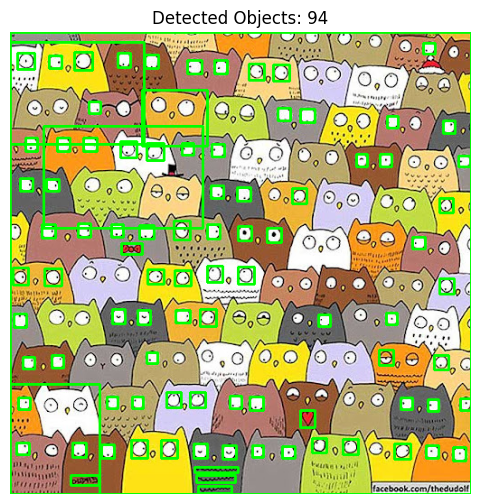

In [31]:
# 9. Hiển thị ảnh cuối cùng với số lượng đối tượng đếm được
img_contours_rgb = cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 6))
plt.imshow(img_contours_rgb)
plt.title(f"Detected Objects: {count_objects}")
plt.axis("off")
plt.show()

In [32]:
# 10. Đếm và in ra số lượng vật thể xuất hiện trong ảnh
print(f"Số lượng vật thể được đếm: {count_objects}")

Số lượng vật thể được đếm: 94
